In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.inspection import inspect
from declare_db import Base, Info, Item
from sqlalchemy.orm import sessionmaker
from collections import defaultdict
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
db_name = "exchange.db"
engine_name = 'sqlite:///exchange.db'

def query_to_dict(rset):
    result = defaultdict(list)
    for obj in rset:
        instance = inspect(obj)
        for key, x in instance.attrs.items():
            result[key].append(x.value)
    return result

In [3]:
engine = create_engine(engine_name)
Base.metadata.bind = engine

DBSession = sessionmaker(bind=engine)
session = DBSession()

In [4]:
rset = session.query(Info).all()
df = pd.DataFrame(query_to_dict(rset)).set_index('id')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
cm_info = df[df['item_name'] == 'crystal_mirror'].sort_values(by='datetime')

In [5]:
cm_info.head(5)

,item_name,timestamp,price,volume,datetime
id,,,,,
21,crystal_mirror,1547025711,131659,19115,2019-01-09 09:21:51
20,crystal_mirror,1547049276,143245,451,2019-01-09 15:54:36
19,crystal_mirror,1547094729,173327,706,2019-01-10 04:32:09
18,crystal_mirror,1547116614,190660,71,2019-01-10 10:36:54
17,crystal_mirror,1547143414,209612,7128,2019-01-10 18:03:34


In [6]:
mats = session.query(Info).join(Item, Info.item_name==Item.info_name).filter(Item.item_type=='Mat').all()

In [7]:
df = pd.DataFrame(query_to_dict(mats)).set_index('id')
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [8]:
df['item_name'].value_counts()

biotite               127
four_leaf_clover       68
fabric                 68
soft_feather           67
emperium               67
bloody_rune            64
light_granule          64
heroic_emblem          64
raccoon_leaf           64
bell                   64
parts                  63
pearl                  63
crystal_mirror         34
coal                   32
rose_quartz            32
cursed_ruby            32
antenna                32
wrapping_lace          32
steel                  32
time_twister           32
mercury                32
key_of_clock_tower     32
orc_claw               32
star_crumb             32
dragon_scale           32
frozen_rose            20
Name: item_name, dtype: int64

In [9]:
mat_prices = df['price'].groupby(df['item_name']).mean().astype('int64').rename('avg_price')

In [10]:
df = df.join(mat_prices, on='item_name')

In [11]:
df.head(5)

,item_name,timestamp,price,volume,datetime,avg_price
id,,,,,,
21,crystal_mirror,1547025711,131659,19115,2019-01-09 09:21:51,195901
20,crystal_mirror,1547049276,143245,451,2019-01-09 15:54:36,195901
19,crystal_mirror,1547094729,173327,706,2019-01-10 04:32:09,195901
18,crystal_mirror,1547116614,190660,71,2019-01-10 10:36:54,195901
17,crystal_mirror,1547143414,209612,7128,2019-01-10 18:03:34,195901


In [12]:
df['avg_price'].unique()

array([ 195901,  142365,  139439,  203175,  199922,  234617,  256297,
        246253,  108476,  201200,  127317,  192303,  125920,  198520,
         94872,  181816,  214251,  296019,   53618,   37352,    1321,
          2312,  602496, 1251236, 1027039,   12505])

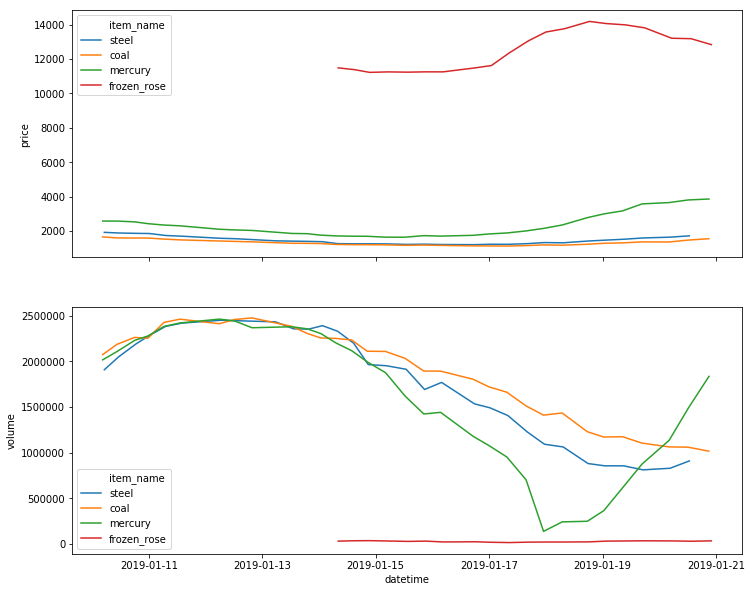

In [28]:
import seaborn as sns
low_mats = df[df['avg_price'] < 40000]
low_mats = low_mats[low_mats['price'] < 80000]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,10))
sns.lineplot(data=low_mats[['item_name', 'price', 'datetime']], x='datetime', y='price', hue='item_name', ax=ax1)
sns.lineplot(data=low_mats[['item_name', 'volume', 'datetime']], x='datetime', y='volume', hue='item_name', ax=ax2)
plt.show()

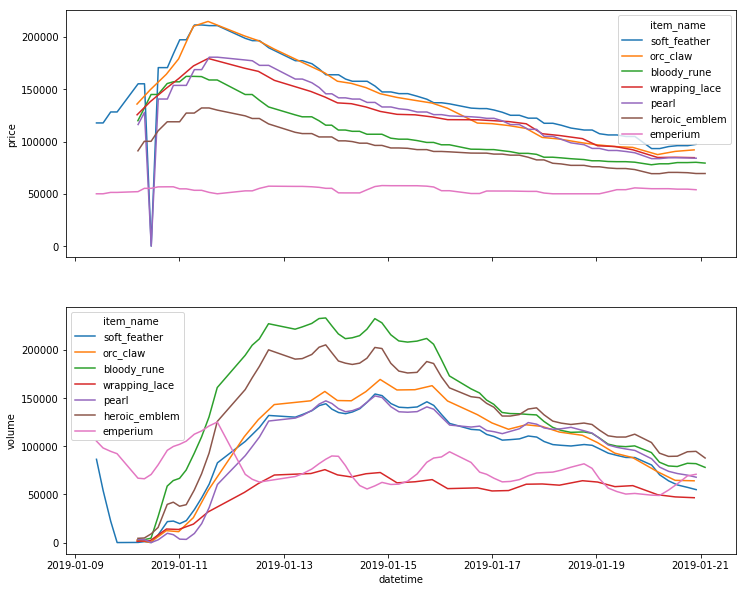

In [27]:
mid_mats = df[(df['avg_price'] > 40000) & (df['avg_price'] < 150000) & (df['price'] < 450000)]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(12,10))
sns.lineplot(data=mid_mats[['item_name', 'price', 'datetime']], x='datetime', y='price', hue='item_name', ax=ax1)
sns.lineplot(data=mid_mats[['item_name', 'volume', 'datetime']], x='datetime', y='volume', hue='item_name', ax=ax2)
plt.show()

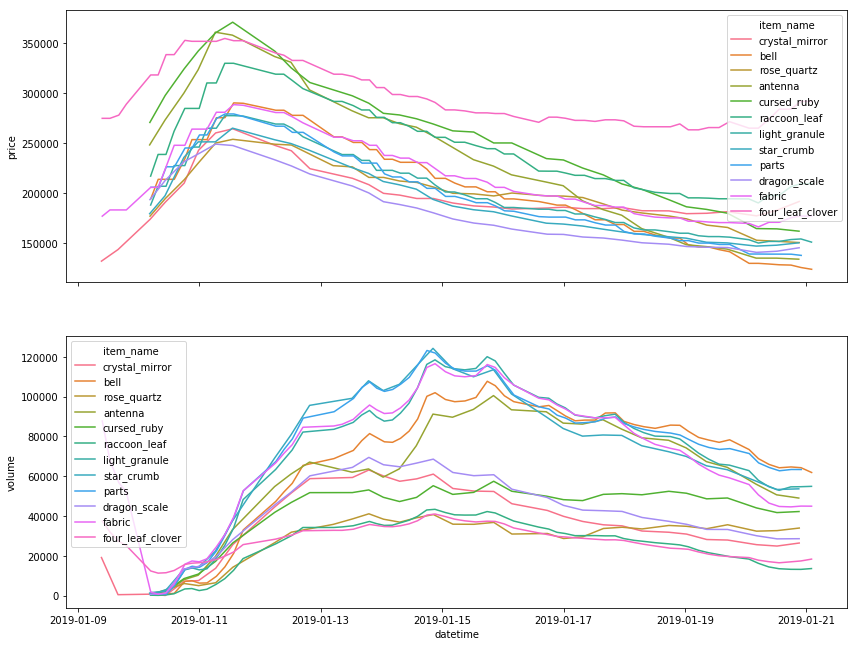

In [31]:
high_mats = df[(df['avg_price'] > 150000) & (df['avg_price'] < 400000) & (df['price'] < 1200000)]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14,11))
sns.lineplot(data=high_mats[['item_name', 'price', 'datetime']], x='datetime', y='price', hue='item_name', ax=ax1)
sns.lineplot(data=high_mats[['item_name', 'volume', 'datetime']], x='datetime', y='volume', hue='item_name', ax=ax2)
plt.show()

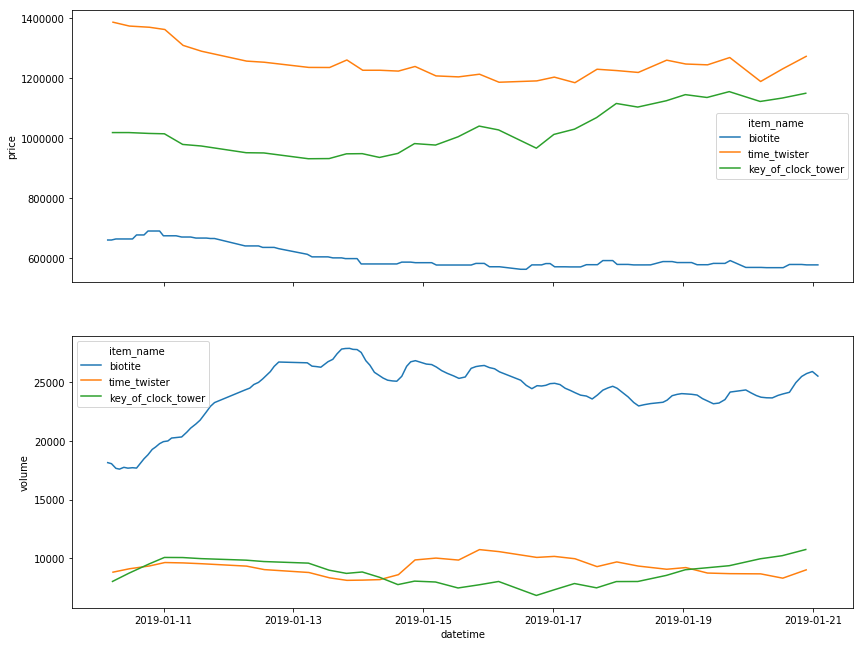

In [32]:
vhigh_mats = df[(df['avg_price'] > 400000)]
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14,11))
sns.lineplot(data=vhigh_mats[['item_name', 'price', 'datetime']], x='datetime', y='price', hue='item_name', ax=ax1)
sns.lineplot(data=vhigh_mats[['item_name', 'volume', 'datetime']], x='datetime', y='volume', hue='item_name', ax=ax2)
plt.show()

In [47]:
low_mats[low_mats['item_name'] == 'steel']

,item_name,timestamp,price,volume,datetime,avg_price
id,,,,,,
658,steel,1547096918,1921,1907949,2019-01-10 05:08:38,37352
657,steel,1547118771,1883,2049649,2019-01-10 11:12:51,37352
656,steel,1547145468,1863,2192264,2019-01-10 18:37:48,37352
655,steel,1547166013,1852,2285289,2019-01-11 00:20:13,37352
654,steel,1547190314,1738,2383037,2019-01-11 07:05:14,37352
653,steel,1547214902,1698,2418949,2019-01-11 13:55:02,37352
652,steel,1547274798,1575,2450644,2019-01-12 06:33:18,37352
651,steel,1547298296,1549,2445461,2019-01-12 13:04:56,37352
650,steel,1547357617,1428,2432970,2019-01-13 05:33:37,37352
